Sample data:
   author_popularity  book_length  num_keywords    genre
0          41.052297          776             5  mystery
1          48.950098          674             5  mystery
2           2.323401          633            19  fantasy
3          41.564184          169            12  mystery
4          65.129649          992            18  fantasy

Classification Report:
              precision    recall  f1-score   support

     fantasy       0.27      0.75      0.40         4
     fiction       0.67      0.40      0.50         5
     mystery       0.50      0.45      0.48        11
 non-fiction       0.83      0.50      0.62        10

    accuracy                           0.50        30
   macro avg       0.57      0.53      0.50        30
weighted avg       0.61      0.50      0.52        30



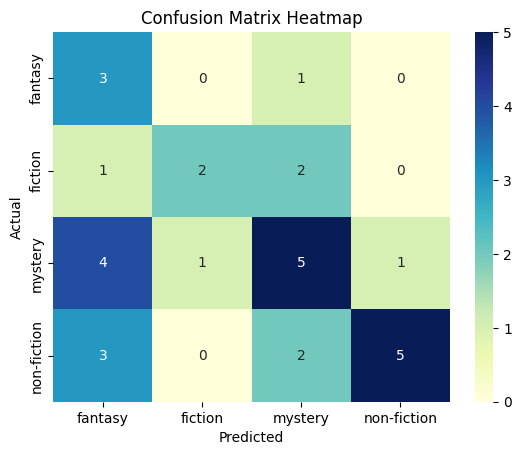

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def classify_book_genres(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Show the first few rows (optional)
    print("Sample data:")
    print(df.head())

    # Separate features (X) and target (y)
    X = df.drop('genre', axis=1)
    y = df['genre']

    # Encode categorical features (like 'auth') using one-hot encoding
    X_encoded = pd.get_dummies(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

    # Initialize and train the Decision Tree Classifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create and show confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example usage (use your actual path):
classify_book_genres("/content/book_genres.csv")
